# Matthew Maroun

# Physics 602 Fall 2022

# 14 December 2022

# Homework 11: 2D Ising Model Simulation

In [1]:
# Import Modules

import numpy as np
from numpy import random as rand
from matplotlib import pyplot as plt
import cycler
import sys
import time

# Set up Plot Stuff
plt.rcParams['axes.prop_cycle'] = cycler.cycler(color='bgrmyk')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

Define functions to be called in the notebook, just to save on memory

In [2]:
# Define a function that generates the system of M x M random spin-1/2 particles
def systemInit(grid_size):
    system_array = rand.choice([i for i in range(-1,2) if i != 0],size=(grid_size,grid_size))
    return system_array

# Define a function that displays the grid
def plotGrid(grid,title):
    plt.imshow(grid)
    plt.title(title)
    plt.colorbar()
    return

# Define a function that performs the Metropolis algorithm
def met2DIsing(grid,T):
    mm = np.size(grid,0)
    for ndx in range(mm**2):
        flip_ndx_row = rand.randint(0,np.size(grid,0))
        flip_ndx_col = rand.randint(0,np.size(grid,1))
        delta_e = 2*grid[flip_ndx_row,flip_ndx_col]*(grid[(flip_ndx_row+1)%mm,flip_ndx_col]+\
                                                        grid[flip_ndx_row,(flip_ndx_col+1)%mm]+\
                                                        grid[(flip_ndx_row-1)%mm,flip_ndx_col]+\
                                                        grid[flip_ndx_row,(flip_ndx_col-1)%mm])
        the_seed = rand.rand()
        if delta_e < 0 or the_seed < np.exp(-delta_e/T):
            grid[flip_ndx_row,flip_ndx_col] = -grid[flip_ndx_row,flip_ndx_col]
        gross_mags = int(np.sum(np.sum(grid)))
    return grid, gross_mags

# Define a function that runs the Metropolis algorithm for a set number of iterations
def met2DIsingSweep(grid,T,numIter):
    mm = np.size(grid,0)
    net_mags = np.zeros([numIter,],dtype=float)
    new_grid = grid
    for ndx in range(numIter):
        new_grid, gross_mags = met2DIsing(new_grid,T)
        net_mags[ndx] = gross_mags/mm**2
    return new_grid, net_mags

# Define a function that plots the net magnetization over each sweep
def plotNetMag(net_mags,title):
    numIter = np.size(net_mags)
    t = np.linspace(0,numIter,numIter)
    plt.plot(t,net_mags,label=f'<m> = {round(np.mean(net_mags),3)} \u00B1 {round(np.std(net_mags),3)}')
    plt.xlabel('t (MC Sweep Number)')
    plt.ylabel('m (Unitless)')
    plt.title(title)
    plt.legend(loc="best")
    return

# Define a function that calls everything (the main function)
def runIsingSim(mm,T,numIter):
    t_crit = 2/np.log(1+np.sqrt(2))
    original_grid = systemInit(mm)
    new_grid, net_mags = met2DIsingSweep(original_grid,T,numIter)
    plt.figure(0)
    plotNetMag(net_mags,f'Net Magnetization vs. Time of 2D Ising Model Simulation, {numIter} MC Sweeps, Grid Size = {mm} x {mm}, T/T_C = {round(T/t_crit,3)}')
    plt.figure(1)
    plotGrid(new_grid,f'Simulation of 2d Ising Model, Grid Size = {mm} x {mm}, {numIter} Iterations, T/T_C= {round(T/t_crit,3)}')
    return

# First Test of the Simulation

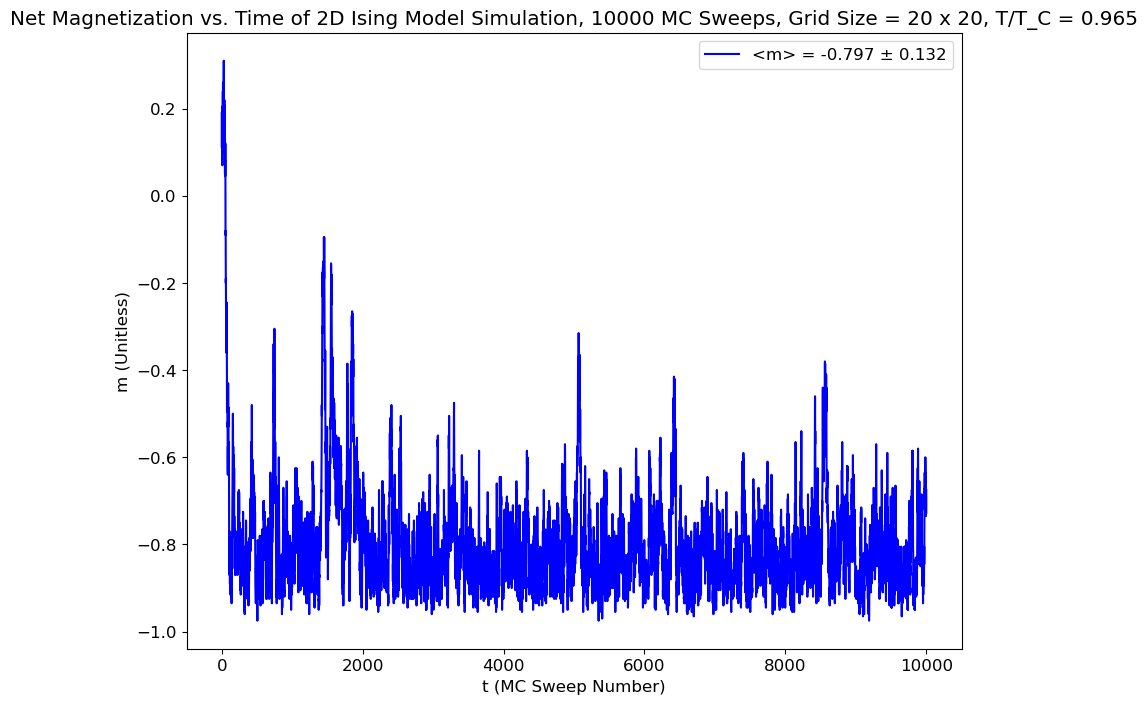

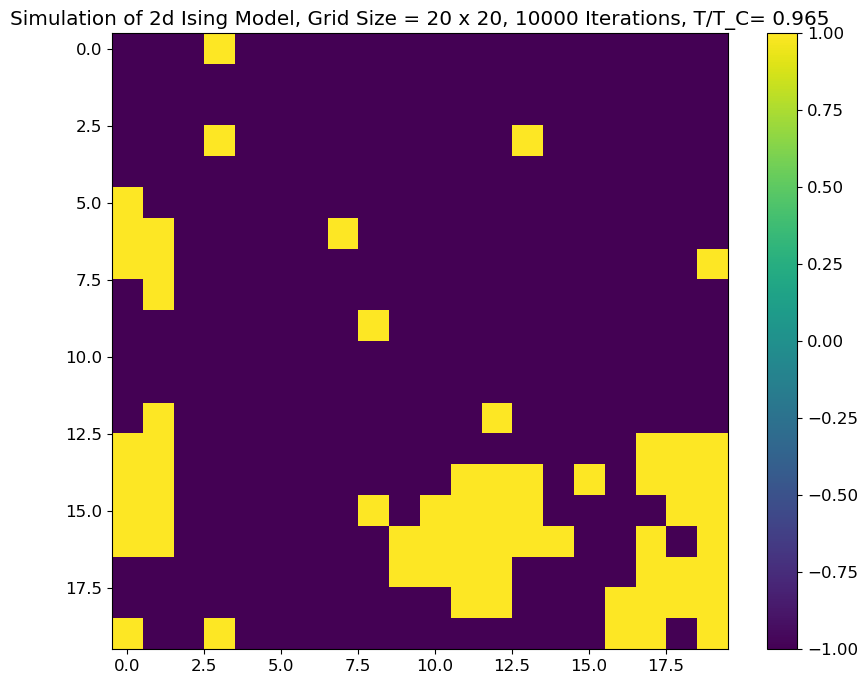

In [3]:
# Define parameters for the problems
mm = 20               # Grid size (mm x mm)
numIter = 10**4       # Number of MC Sweeps

# Set a temperature for testing
T = 2.19               # kT/J

# Run the Sim
runIsingSim(mm,T,numIter)

# Comments

The temperature chosen for the test run is slightly less than the exact critical temperature for the 2D Ising Model, so over 10<sup>4</sup> iterations, the system is expected to have a net magnetization of close to +/- 1, but with significant fluctuations between each simulation. We see, after the program is run, that the magnetization averages around -0.8 +/- 0.1, but with some fluctuations up to -0.5 and even to -0.25.

In some runs of this cell, after some MC sweeps, the net magnetization flips sign, with the same such fluctuations in negative. We expect this behavior for a temperature below the critical temperature because, while all spins have yet to be flipped with equal probability to +/- 1 (what we expect for temperatures greater than the critical temperature), the spins are not un-relaxed to a uniform orientation (what we expect as we approach T = 0). In other words, when examining the m vs. T graph of this system at B=0, the vertical distance between the "+1 curve" and the "-1 curve" of the graph is relatively low and "traverseable" near the critical temperature, indicating the non-negligible possibility of the system flipping its net magnetization within one MC sweep. 

When examining the 2D visualization of the system, it can be seen that most spins have been flipped down, with a few patches and some lone of spins flipped up, indicating a collapse into one of the two states (+1, -1; in this case, -1) as T goes to 0.

# Run of the Simulation at the Critical Temperature

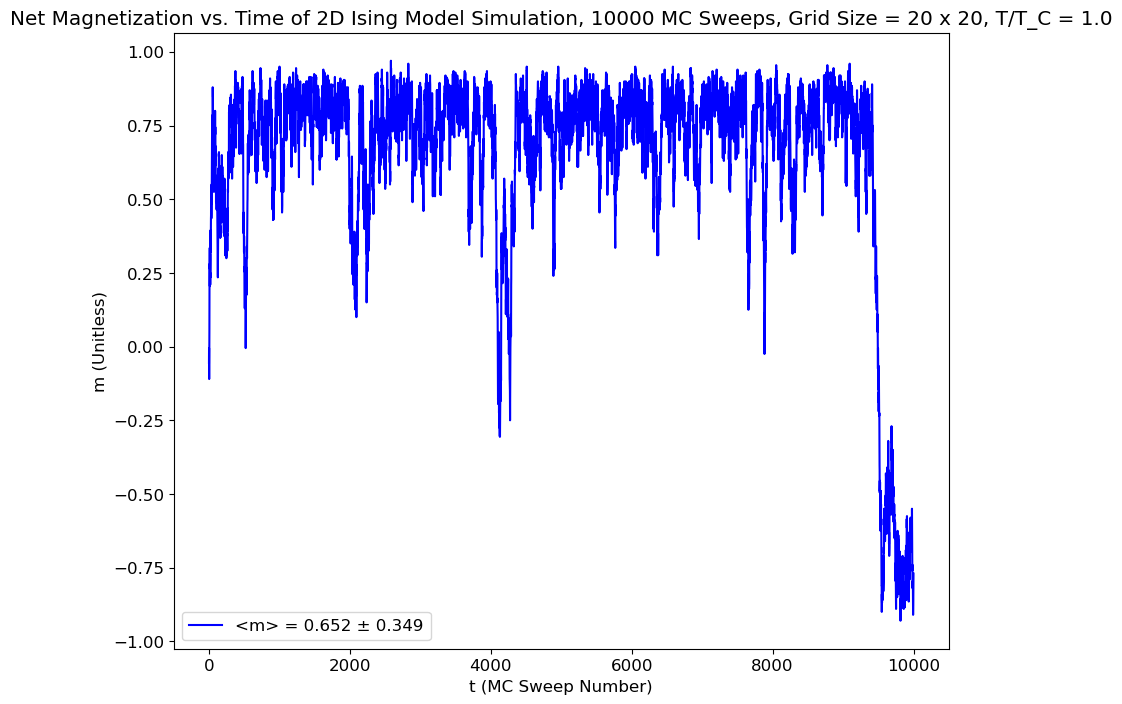

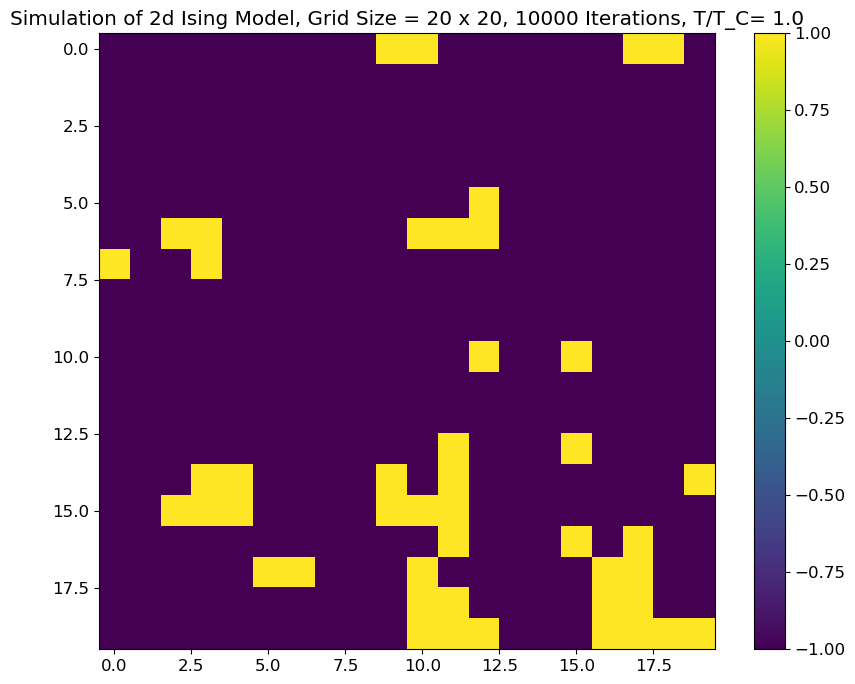

In [7]:
# Plot the system at the critical temperature
t_crit = 2/np.log(1+np.sqrt(2))
runIsingSim(mm,t_crit,numIter)

# Comments

At the critical temperature, it is expected that the system has a net magnetization of 0, since at that temperature is where both "sides" of the m(T) curve meet at 0, indicating a phase transition. Instead, what we see here is a net magnetization of 0.652 +/- 0.349, indicating that the given temperature is less than the critical temperature. The critical temperature for this system was given as (in relative units) 2/ln(1+sqrt(2)), which is the critical temperature for an infinite 2d lattice of spin-1/2 particles. Since the simulation is of a 20 x 20 lattice with periodic boundary conditions, far below the thermodynamic limit, this temperature apparently slightly underestimates the critical temperature. A phase transition is likely to occur at a temperature close to the one programmed for this simulation, though.

In addition, similar behavior is exhibited as described in the previous cell, wherein one MC sweep flips the net magnetization to its opposite value, due to nearly all the random numbers generated that governed the acceptance of the spin flip were lower than the Boltzmann probability for those spin flips. As previously stated, such a phenomenon is possible, since, when examining the m vs. T graph of this system at B=0, the vertical distance between the "+1 curve" and the "-1 curve" of the graph is relatively low and "traverseable" near the critical temperature.

Since the programmed critical temperature underestimates the actual critical temperature slightly, we see a distribution of spins similar to that from the previous run, indicating that the system has collapsed very nearly to one of two states (+1 or -1; in this case, -1), for T approaching 0.

# Run of the Simulation at Twice the Critical Temperature

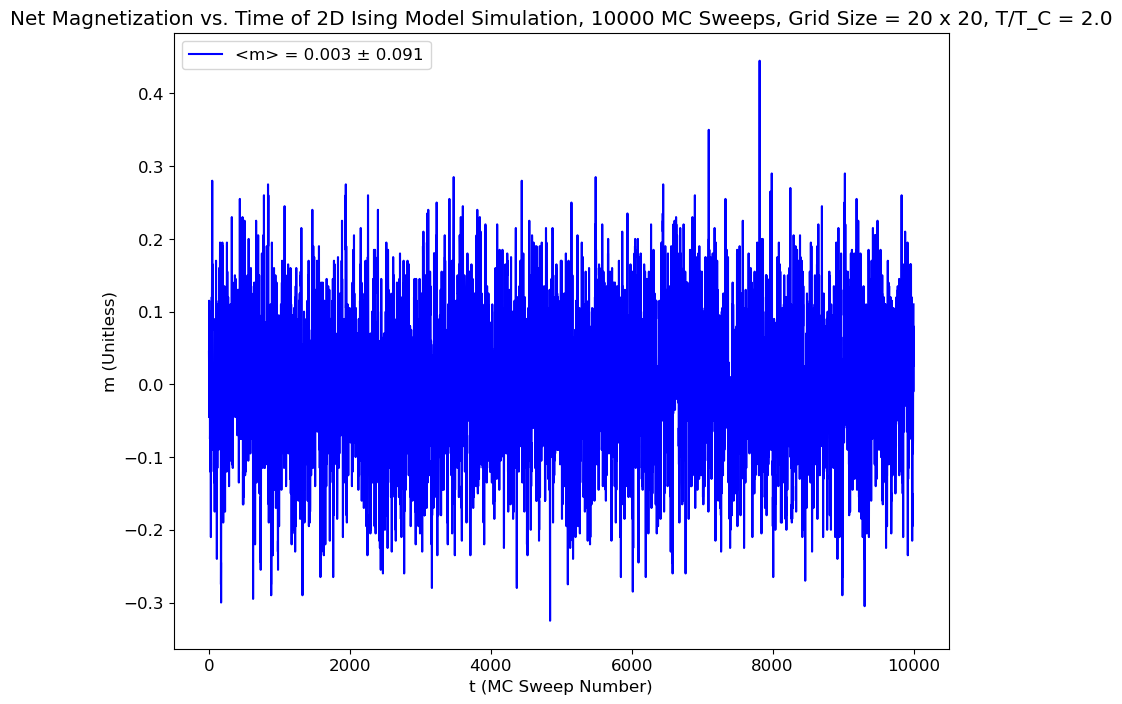

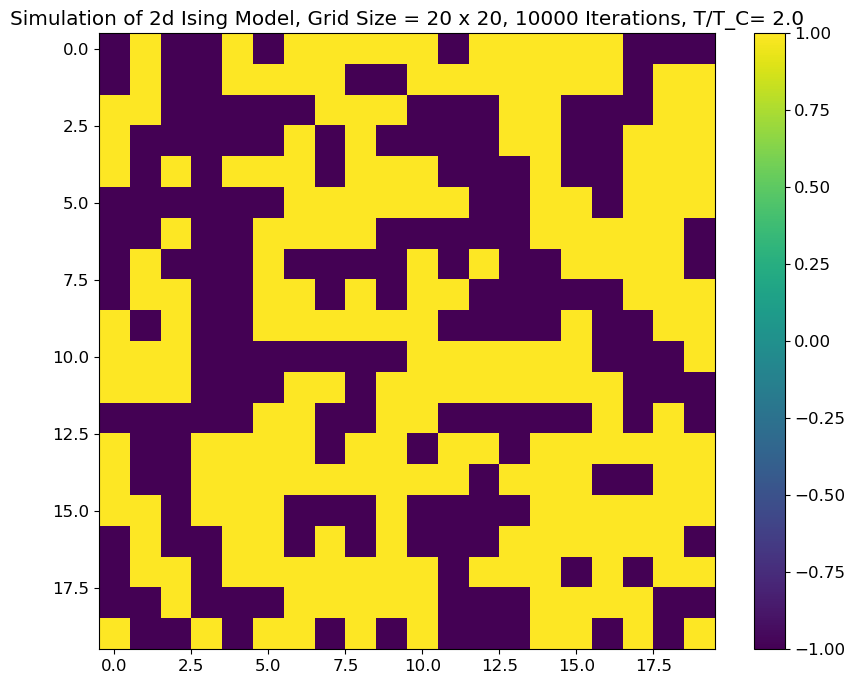

In [8]:
# Plot the system at twice the critical temperature
runIsingSim(mm,2*t_crit,numIter)

# Comments

For a temperature much greater than the critical temperature, it is expected that no net magnetization is present, indicating an equal likelihood of spin up or down for each individual spin. This expectation is in accordance with a maximal entropy state achieved for high temperatures/energies of the system. Indeed, such a situation is shown above with each MC sweep generating a net magnetization of 0.003 +/- 0.091, thus showing nearly the maximally-disordered configuration of spins for the system.

Looking at the map of spins, it can be seen that no major "bunches" of spins exist; instead, there is a trending towards an even distribution of spins throughout the lattice, justifying the maximally-disordered nature of this configuration.

# Run of the System at One Half the Critical Temperature

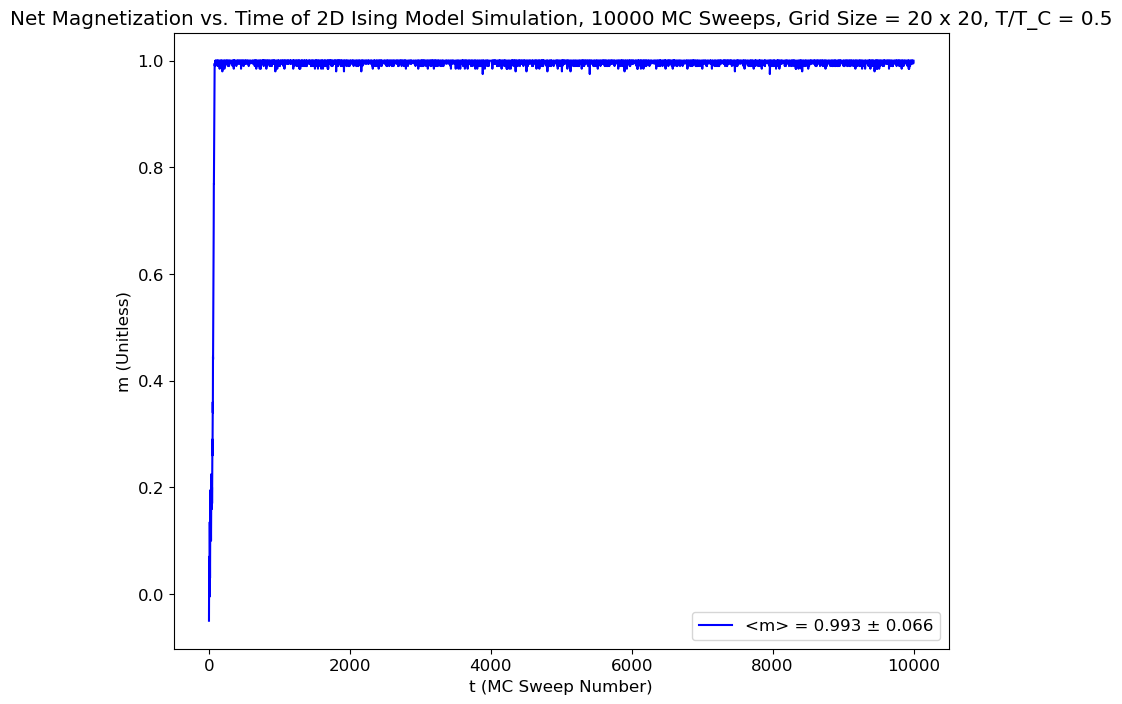

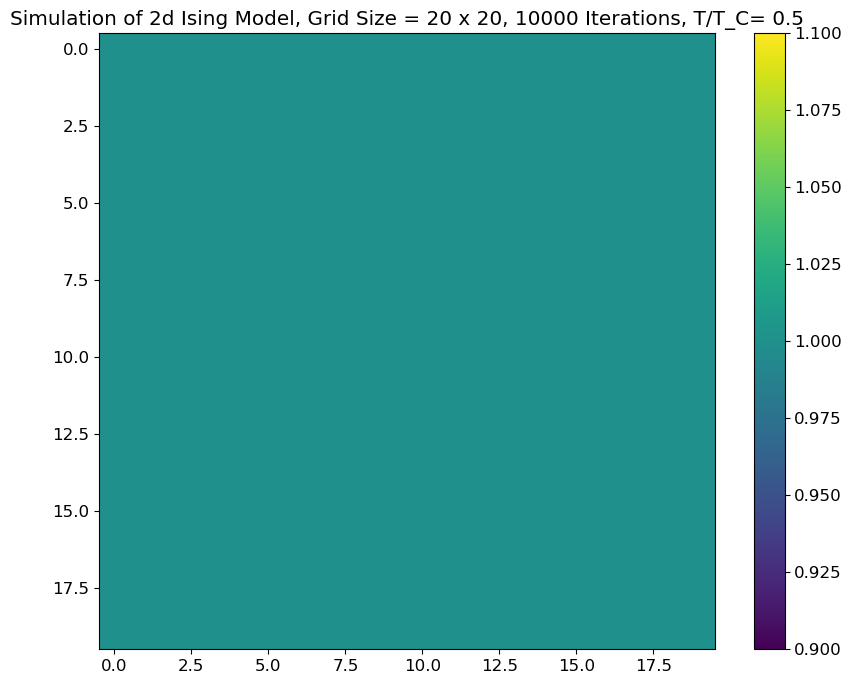

In [6]:
# Plot the system at one half the critical temperature
runIsingSim(mm,0.5*t_crit,numIter)

# Comments

For a temperature much lower than the critical temperature, it is expected for the system to be nearly entirely collapsed into one of two states with net magnetization of +1 or -1, in accordance with the third law of thermodynamics and nearly equal probability of finding a single spin up or down. Indeed, such a phenomenon is displayed here, with the system averaging a net magnetization of 0.993 +/- 0.066, indicating that the system has collapsed almost entirely into the +1 state each time. Furthermore, since the system cooled into the +1 state, with each additional MC sweep, it stayed almost entirely in that state, since such a state can be regarded as a "stable equilibrium sink" (in the plot of m vs. T, for B=0, the vertical distance between m = +1 and m = -1 is at its greatest, implying most difficulty to traverse between the two states). 

Looking at the plot, we see that the entire system ended up in the +1 state after 10<sup>4</sup> MC sweeps.